In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.cluster import KMeans

In [11]:
#import the data
#This dataset was sourced from the UCI Machine Learning Repository.

data=pd.read_csv("datasets/seeds.csv",header=None)

In [14]:
features=data.iloc[:,0:7].values

correct_labels = data.iloc[:,7].replace({1:'Kama wheat', 2:'Rosa Wheat' , 3:'Canadian Wheat'})

In [15]:
features.shape , correct_labels.shape

((210, 7), (210,))

## How many clusters of grains

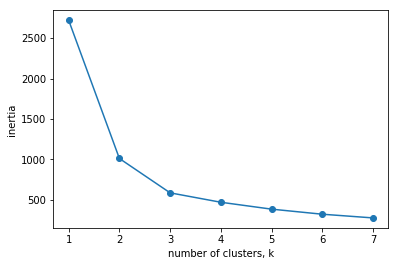

In [16]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


According to the elbow criteria, it is 3 clusters. Thus, coinciding with our lables. 

"Kama", "Rosa" and "Canadian". 

## Evaluating the grain clustering

In [7]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'correct_labels': correct_labels})

# Create crosstab
pd.crosstab(df['labels'],df['correct_labels'])



correct_labels,Canadian Wheat,Kama wheat,Rosa Wheat
labels,,,
0,68,9,0
1,2,60,10
2,0,1,60


Based on the cross tab results, our model has performed well.

## Visualization of the Grain clusters

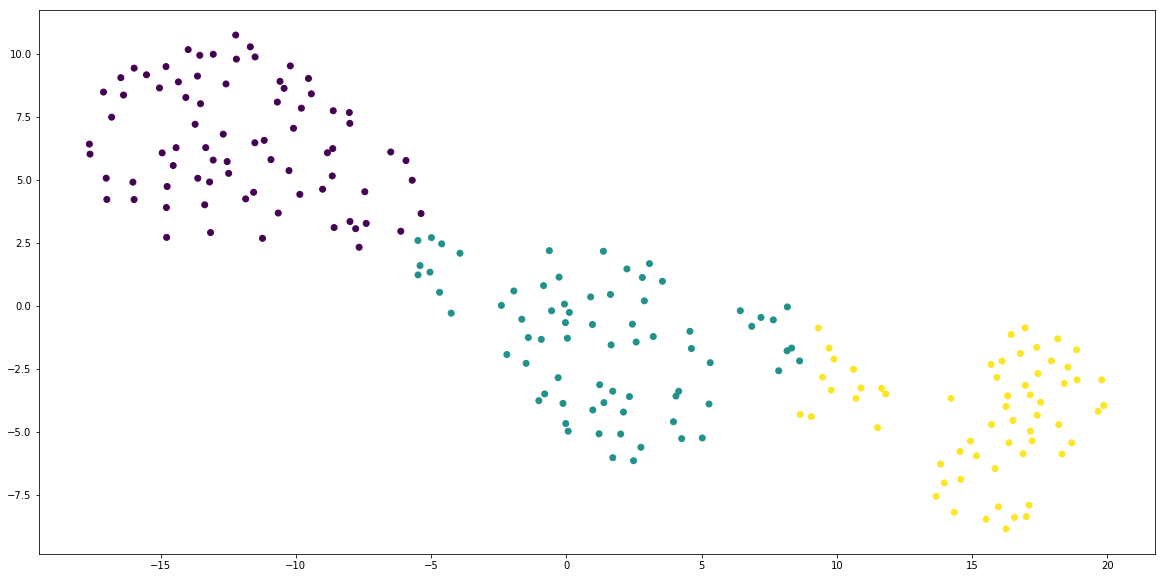

In [8]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model_tsne = TSNE(learning_rate=100)

# Apply fit_transform to samples: tsne_features
tsne_features = model_tsne.fit_transform(features)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(20,10))
plt.scatter(xs,ys,c=labels)


plt.show()
